In [50]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import scipy
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load Dataset as a dataframe
df = pd.read_csv('EPL_Soccer_MLR_LR.csv')

#### Explore data set

In [4]:
df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [5]:
#run info and describe for basic data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [6]:
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


#### Attempting to predict players score 

In [7]:
#exploratory analysis. Determine is there are any strong correlations with score that we can determine 
#Looking for correlations between variables to identify best predictor for response
df.corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


can see strongest predictor of score is cost
#### Plot Cost verse Score

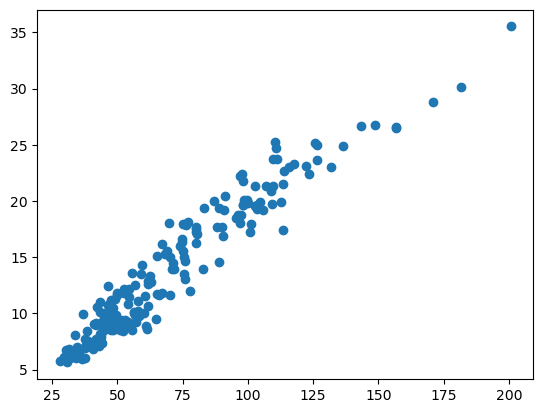

In [38]:
#plot cost vs score
plt.scatter(df['Cost'], df['Score']);

strong linear association between cost and score

In [25]:
# Assign x, y to do training testing split
x = df['Cost']
y = df['Score']

#Splitting with 75% training and 25% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75,
                                                   test_size = 0.25, random_state = 100)

In [27]:
#statsmodel approach to regression
#fit the model

lr = sm.OLS(y_train, x_train).fit()

#Print parameters
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.167e+04
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                   3.84e-144
Time:                        16:40:43   Log-Likelihood:                         -297.42
No. Observations:                 151   AIC:                                      596.8
Df Residuals:                     150   BIC:                                      599.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1929      0.002    108.014      0.000       0.189       0.196
==============================================================================
Omnibus:                        0.244   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.054
Skew:                           0.021   Prob(JB):                        0.974
Kurtosis:                       3.083   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#since there is no intercept Beta0 model with Cost, need to force an intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           6.91e-88
Time:                        16:43:09   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.004       0.305       1.589
Cost           0.1821      0.004     44.456      0.000       0.174       0.190
==============================================================================
Omnibus:                        3.849   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.867
Skew:                           0.359   Prob(JB):                        0.145
Kurtosis:                       2.685   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#extract b0 and b1
b0 = lr.params[0]
b1 = lr.params[1]

In [32]:
print(lr.params)

const    0.947185
Cost     0.182083
dtype: float64


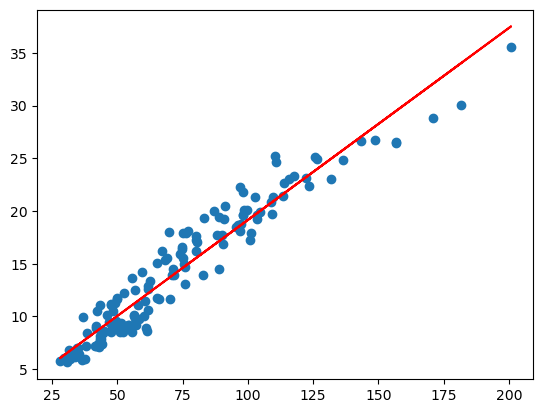

In [33]:
#plot the fitted line on training data
plt.scatter(x_train, y_train)
plt.plot(x_train, b0 + b1*x_train, 'r')
plt.show()

In [35]:
#plot the fitted line on test data
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

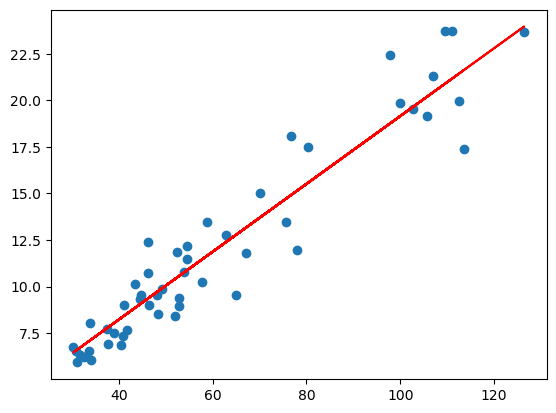

In [36]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

## Diagonstics
### Checklist:
Non-linerarity, 
non-constant variance,
deviations from normality,
errors not IID,
Outliers,
Missing Predictors

In [42]:
# Build prediction on training data
predictions_y = lr.predict(x_train_with_intercept)

In [44]:
#Find Residuals
r_i = (y_train - predictions_y)

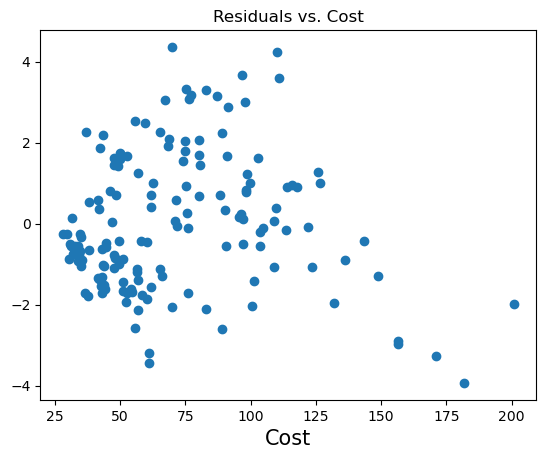

In [45]:
#Residuals vs. predictor in training data
plt.title('Residuals vs. Cost')
plt.xlabel('Cost', fontsize = 15)
plt.scatter(x_train, r_i)
plt.show()

((array([-2.60603471, -2.28639722, -2.10324767, -1.97158309, -1.867224  ,
         -1.7799545 , -1.70445293, -1.63757876, -1.57731662, -1.52229259,
         -1.47152616, -1.42429196, -1.3800376 , -1.33833223, -1.29883298,
         -1.26126233, -1.22539231, -1.19103324, -1.1580255 , -1.12623343,
         -1.09554071, -1.06584677, -1.03706405, -1.0091158 , -0.98193434,
         -0.95545967, -0.92963831, -0.90442237, -0.87976879, -0.85563868,
         -0.83199678, -0.80881102, -0.78605212, -0.76369328, -0.74170987,
         -0.7200792 , -0.69878032, -0.67779383, -0.65710172, -0.6366872 ,
         -0.61653466, -0.59662946, -0.57695791, -0.55750713, -0.53826504,
         -0.51922023, -0.50036191, -0.48167989, -0.4631645 , -0.44480656,
         -0.42659733, -0.40852846, -0.39059201, -0.37278035, -0.35508619,
         -0.33750252, -0.32002258, -0.3026399 , -0.28534819, -0.26814138,
         -0.25101361, -0.23395916, -0.2169725 , -0.20004822, -0.18318105,
         -0.16636584, -0.14959754, -0.

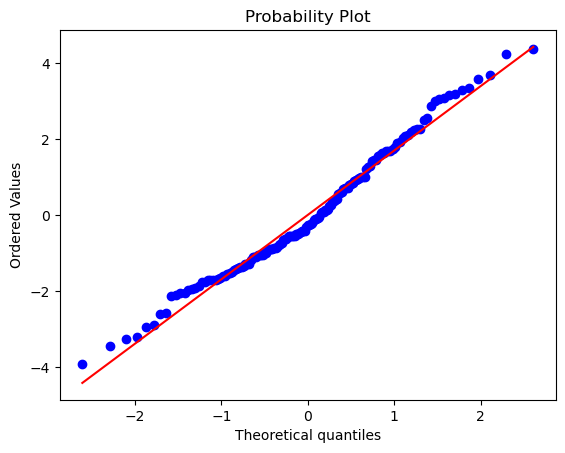

In [48]:
#Normality plot
scipy.stats.probplot(r_i,plot=plt)

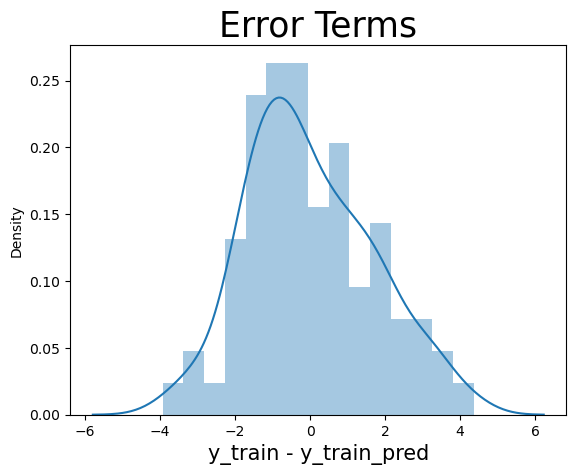

In [51]:
#Tails might be a little heavy, but overall no clear reason to reject normality expression
# Evaluate normailty through histogram
#plotting the histogram using residual values
fig = plt.figure()
sns.distplot(r_i, bins = 15)
plt.title('Error Terms', fontsize = 25)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

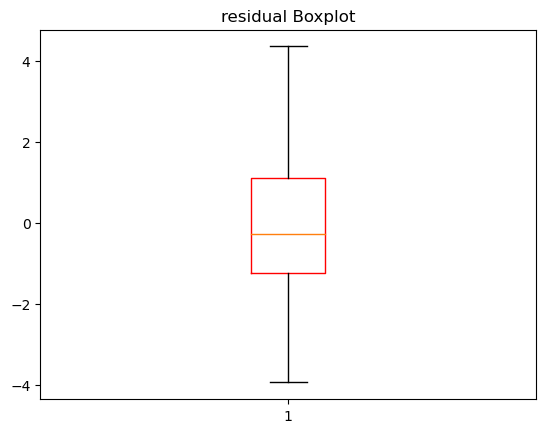

In [54]:
#boxplot for outliers
plt.boxplot(r_i, boxprops = dict(color='red'))
plt.title('residual Boxplot');

In [55]:
#diagnostics
test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

51

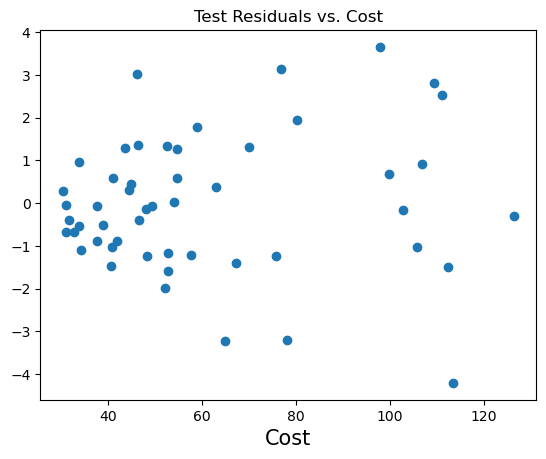

In [56]:
#residuals vs. predictor in test set
plt.title('Test Residuals vs. Cost')
plt.xlabel('Cost', fontsize = 15)
plt.scatter(x_test, test_residuals)
plt.show()

#### seeing some evidence of non-constant variance

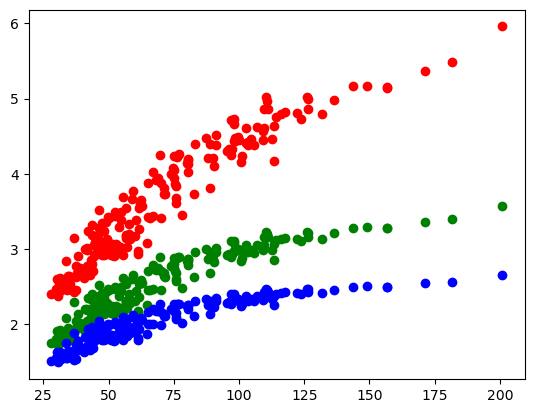

In [61]:
# first step to testing non-constant
sqrt_y = np.sqrt(y)
plt.scatter(x, sqrt_y, color ='red');

#try ln
ln_y = np.log(y)
plt.scatter(x, ln_y, color='green');

#Try a BC transformation
#Box Cox procedure on all cost
bc_y = list(stats.boxcox(y))
bc_y = bc_y[0]
plt.scatter(x, bc_y, color = 'blue');

seems sqrt is our best option

In [62]:
#Run regression on set
x_train, x_test, y_train, y_test = train_test_split(x, sqrt_y, train_size =0.75,
                                                   test_size = 0.25, random_state = 10 )


In [63]:
#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     1437.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):           2.07e-78
Time:                        18:38:33   Log-Likelihood:                -2.4842
No. Observations:                 151   AIC:                             8.968
Df Residuals:                     149   BIC:                             15.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8531      0.049     37.682      0.000       1.756       1.950
Cost           0.0251      0.001     37.908      0.000       0.024       0.026
==============================================================================
Omnibus:                        2.747   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                2.643
Skew:                           0.260   Prob(JB):                        0.267
Kurtosis:                       2.613   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const    1.853108
Cost     0.025098
dtype: float64


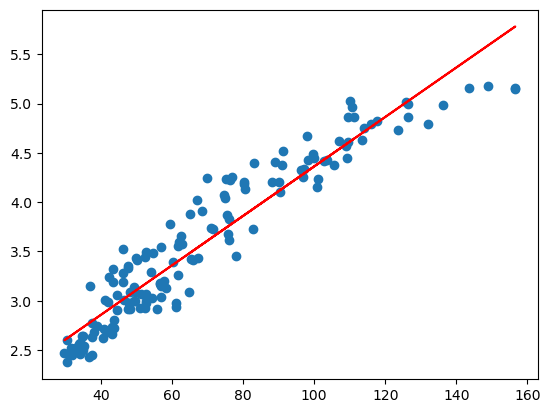

In [65]:
#extract the B0, B1
print(lr.params)
b0 = lr.params[0]
b1 = lr.params[1]

#Plot the fitted line on training data
plt.scatter(x_train, y_train)
plt.plot(x_train, b0 + b1*x_train, 'r')
plt.show()

In [66]:
#plot the fitted line on test data
x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

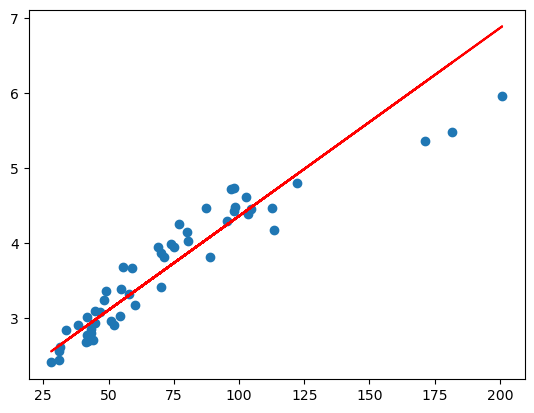

In [67]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

In [68]:
#diagnostics
test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

51

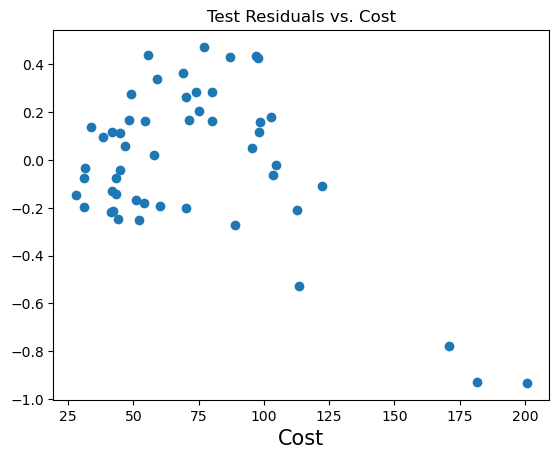

In [69]:
#residuals vs. predictor in test set
plt.title('Test Residuals vs. Cost')
plt.xlabel('Cost', fontsize = 15)
plt.scatter(x_test, test_residuals)
plt.show()

# Non- Constant variance reduced, but also reduced our coefficient of determination